In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import PReLU, Dense
import pickle
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
print('finished')

finished


In [12]:
matrix=np.zeros([1000,2])
data=pd.read_excel(r'C:\\asd\\games.xls')
names=pd.DataFrame(matrix)
names_variables=names.iloc[:,:]
tags=data.iloc[:,1:72]
tag_col=tags.shape[1]
tag_row=tags.shape[0]
number = 1
print(tags.shape)

for i in range(1,tag_col):
    for j in range(tag_row):
        var = tags.iloc[j, i]
        if type(var)!=int and str(var)!='nan':
            liste=tags.values
            if any(var in row for row in liste):
                names_variables.iloc[number-1,0]=(number-1)
                names_variables.iloc[number-1,1]=var
                listee=np.array(liste)
                listee[np.where(listee == str(var))]=number
                tags=pd.DataFrame(listee)
            number = number + 1


#Write '0' to every blanks.
liste=tags.values
listee=np.array(liste)
listee[pd.isna(listee)] = 0
print('finished')


(11060, 54)
finished


In [13]:
tags.shape

(11060, 54)

In [14]:
#Determine the output matrix and start to prepare input matrix.
tags=pd.DataFrame(listee)
only_tags=tags.iloc[:,1:tag_col]
values_datas=tags.iloc[:,:1]
values=values_datas.values
only_tag_no=only_tags.values
print('finished')

finished


In [15]:
print(only_tags.head(),values_datas.head())
print(number)

  1   2   3   4   5   6   7  8  9  10 ...   44   45   46   47   48   49   50  \
0  1   6  10  14  24  26   0  0  0  0 ...  269  279   48   71  347  116    0   
1  1   4   0   0   0   0   0  0  0  0 ...  102  255  372  101  220  467   57   
2  1   2  11  16   5  18  27  4  0  0 ...   69   70  329  345  167  426  206   
3  2  16   5  18  27   8   0  0  0  0 ...  350  109  128  161  280   48  203   
4  1   6   0   0   0   0   0  0  0  0 ...    0    0    0    0    0    0    0   

    51   52  53  
0    0    0   0  
1   46  133   0  
2  373  249   0  
3  249  401  29  
4    0    0   0  

[5 rows x 53 columns]          0
0  94.4598
1  78.5037
2  87.3051
3  81.1594
4  37.6712
475


In [16]:
#Create input matrix.
matrix=np.zeros([tag_row,number-1])
for i in range(tag_row-1):
    tag_list=only_tag_no[i]
    matrix_list=matrix[i]
    for one_tag in tag_list:
        if one_tag==0:
            pass
        else:
            matrix_list[one_tag-1]=1
matrix=np.array(matrix)
row=matrix.shape[0]
np.save(r'C:\\MY ALL PROJECT\\steam_linear_regression\\names_variables_2.npy',names_variables, allow_pickle=True)
np.save(r'C:\\MY ALL PROJECT\\steam_linear_regression\\matrix_2.npy',matrix, allow_pickle=True)
np.save(r'C:\\MY ALL PROJECT\\steam_linear_regression\\row_2.npy',row, allow_pickle=True)
np.save(r'C:\\MY ALL PROJECT\\steam_linear_regression\\number_2.npy',number, allow_pickle=True)
np.save(r'C:\\MY ALL PROJECT\\steam_linear_regression\\values_2.npy',values, allow_pickle=True)

print('finished')


finished


In [17]:
print(matrix.shape,values.shape)

(11060, 474) (11060, 1)


In [88]:
import numpy as np
import matplotlib.pyplot as pltt
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import PReLU, Dense
import pickle
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras import activations

names_variables=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\names_variables.npy',allow_pickle=True)
checkpoint_path=(r'C:\\MY ALL PROJECT\\steam_linear_regression\\neural_network.ckpt')
matrix=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\matrix.npy')
number=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\number.npy')
values=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\values.npy',allow_pickle=True)
row=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\row.npy', allow_pickle=True)


names_variables_2=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\names_variables_2.npy',allow_pickle=True)
checkpoint_path_2=(r'C:\\MY ALL PROJECT\\steam_linear_regression\\neural_network.ckpt')
matrix_2=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\matrix_2.npy')
number_2=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\number_2.npy')
values_2=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\values_2.npy',allow_pickle=True)
row_2=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\row_2.npy', allow_pickle=True)



cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,verbose=1,save_weights_only=True,period=100)
chechpoint_dir= os.path.dirname(checkpoint_path)
new_matrix = np.zeros([row,1])
train_matrix_2=np.asarray(matrix_2[:6000,:]).astype('float32')
train_values_2=np.asarray(values_2[:6000,:]).astype('float32')
test_matrix_2=np.asarray(matrix_2[10060:,:]).astype('float32')
test_values_2=np.asarray(values_2[10060:,:]).astype('float32')
train_matrix=np.asarray(matrix[:3600,:]).astype('float32')
train_values=np.asarray(values[:3600,:]).astype('float32')
test_matrix=np.asarray(matrix[3600:,:]).astype('float32')
test_values=np.asarray(values[3600:,:]).astype('float32')
row = train_matrix.shape[0]
coloumn = train_matrix.shape[1]
neural_network_data= tf.train.latest_checkpoint(chechpoint_dir)
names_variables=pd.DataFrame(names_variables)

print('Finished')

Finished


In [89]:
print(test_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [90]:
print(test_matrix.shape,test_values.shape)
print(train_matrix.shape,train_values.shape)

(313, 427) (313, 1)
(3600, 427) (3600, 1)


In [24]:
print("Num GPUs Available: ", tf.test.gpu_device_name())

Num GPUs Available:  /device:GPU:0


In [376]:
model = Sequential(
    [
        
        tf.keras.layers.Dense(coloumn,input_dim=coloumn,  activation ='relu',kernel_regularizer=tf.keras.regularizers.l2(0)),
        tf.keras.layers.Dense(coloumn*50,activation = tf.math.exp),
        tf.keras.layers.Dense(1,activation = 'linear'),

        
    ]
)



In [ ]:

model.compile(optimizer='adam',loss="mse")
x=[]
y=[]

model.fit(train_matrix,train_values,epochs=1000)
a=model.evaluate(test_matrix,test_values)


Epoch 1/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 259.9138
Epoch 2/1000
3600/3600 [==============================] - 1s 347us/step - loss: 83.8262
Epoch 3/1000
3600/3600 [==============================] - 1s 349us/step - loss: 67.6321
Epoch 4/1000
3600/3600 [==============================] - 1s 349us/step - loss: 50.8918
Epoch 5/1000
3600/3600 [==============================] - 1s 348us/step - loss: 35.3223
Epoch 6/1000
3600/3600 [==============================] - 1s 348us/step - loss: 27.2383
Epoch 7/1000
3600/3600 [==============================] - 1s 348us/step - loss: 20.7748
Epoch 8/1000
3600/3600 [==============================] - 1s 349us/step - loss: 16.1338
Epoch 9/1000
3600/3600 [==============================] - 1s 348us/step - loss: 12.4780
Epoch 10/1000
3600/3600 [==============================] - 1s 350us/step - loss: 11.2618
Epoch 11/1000
3600/3600 [==============================] - 1s 351us/step - loss: 10.6251
Epoch 12/1000
3600/3600 [======

In [373]:
a=model.evaluate(test_matrix,test_values)
print(a)


313/313 [==============================] - 1s 4ms/step
125.97385301681372


In [59]:
for i in range(len(x)):
    x[i]=x[i]*1000
print(x)

[0, 1000, 2000, 3000]


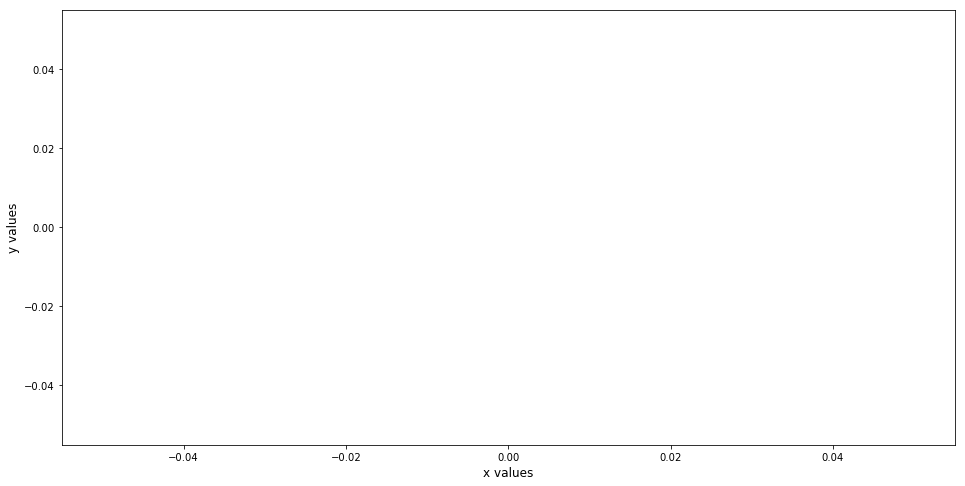

In [352]:
pltt.figure(figsize=(16,8))
pltt.plot(x[:],y[:])
pltt.xlabel("x values", size=12)
pltt.ylabel("y values", size=12)
pltt.show()



In [250]:
print(min(y))

92.40403864558893


In [ ]:
model.summary()

In [86]:
y=[286, 273, 229, 223, 246, 221, 228, 228, 225, 220, 225, 225, 226, 231]


In [374]:
perfect=0
meh=0
bok=0
for i in range(test_matrix.shape[0]):
    a=round(model.predict(test_matrix[i].reshape(1,427))[0,0])
    b=round(test_values[i][0])
    if abs(b-a)<=2:
        perfect= perfect + 1
    elif abs(b-a)<=10:
        meh= meh + 1
    else:
        bok= bok + 1
    
print('kesin bilinen oranı : %', perfect*100/(perfect+meh+bok))
print('az çok bilinen oranı : %', meh*100/(perfect+meh+bok))
print('hiç bilinmeyen oranı : %', bok*100/(perfect+meh+bok))

kesin bilinen oranı : % 15.97444089456869
az çok bilinen oranı : % 50.47923322683706
hiç bilinmeyen oranı : % 33.546325878594246


In [353]:
perfect=0
meh=0
bok=0
for i in range(test_matrix.shape[0]):
    a=model.predict(test_matrix[i].reshape(1,427))[0,0]
    b=test_values[i][0]
    if abs(b-a)<=2:
        perfect= perfect + 1
    elif abs(b-a)<=10:
        meh= meh + 1
    else:
        bok= bok + 1
    
print('kesin bilinen oranı : %', perfect*100/(perfect+meh+bok))
print('az çok bilinen oranı : %', meh*100/(perfect+meh+bok))
print('hiç bilinmeyen oranı : %', bok*100/(perfect+meh+bok))

kesin bilinen oranı : % 18.210862619808307
az çok bilinen oranı : % 46.96485623003195
hiç bilinmeyen oranı : % 34.82428115015974


In [67]:
final=0
for i in range(test_matrix.shape[0]):
    a=round(model.predict(test_matrix[i].reshape(1,474))[0,0])
    b=round(test_values[i][0])
    final=final+abs(a-b)
print(final)

11253.0


In [28]:
final=0
for i in range(test_matrix.shape[0]):
    a=round(model.predict(test_matrix[i].reshape(1,474))[0,0])
    b=round(test_values[i][0])
    final=final+abs(a-b)
print(final)

6709.0


In [9]:
def detector(names_variables):
    a=input()
    input_list=[]
    input_list.append(a)
    number_list=[]
    while a!='end':
        a=input()
        input_list.append(a)
    input_list.pop()
    for i in input_list:
        for j in range(names_variables.shape[0]):
            if i == names_variables.iloc[j, 1]:
                number_list.append(names_variables.iloc[j, 0])
    return number_list       


In [115]:
number_list=detector(names_variables)
Violent
Visual Novel
Comedy
Immersive Sim
Drama
Simulation
Choices Matter
Cinematic
Interactive Fiction
Action-Adventure
Choose Your Own Adventure
Adventure
FMV
Multiple Endings
Realistic
Female Protagonist
Emotional
Singleplayer
Atmospheric
Gor

Violent
Visual Novel
Comedy
Immersive Sim
Drama
Simulation
Choices Matter
Cinematic
Interactive Fiction
Action-Adventure
Choose Your Own Adventure
Adventure
FMV
Multiple Endings
Realistic
Female Protagonist
Emotional
Singleplayer
Atmospheric
Gore
end


In [116]:
def result_printer(x,no):
    matrix=np.zeros((no-1))
    print(matrix[5])
    for i in x:
        matrix[int(i)]=1
    return matrix
test_matrix=result_printer(number_list,number)

0.0


In [48]:
test_matrix=np.zeros([1,427])
for i in range(427):
    test_matrix[0,i]=1

In [117]:
np.save(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test16_matrix.npy',test_matrix, allow_pickle=True)
print(test_matrix)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [256]:
Eldenring_96=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test_matrix.npy', allow_pickle=True)
Sons_of_The_Forest_=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test1_matrix.npy', allow_pickle=True)
Just_Cause_3=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test2_matrix.npy', allow_pickle=True)
Hades_93=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test3_matrix.npy', allow_pickle=True)
Star_field_=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test4_matrix.npy', allow_pickle=True)
Red_Fall_53=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test5_matrix.npy', allow_pickle=True)
Story_Rich=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test6_matrix.npy', allow_pickle=True)
Anomaly_Agent_=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test7_matrix.npy', allow_pickle=True)
test=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test8_matrix.npy', allow_pickle=True)
Gollum_39=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test9_matrix.npy', allow_pickle=True)
Fuga_Melodies_of_Steel_2__84=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test10_matrix.npy', allow_pickle=True)
Teslagrad_2__71=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test11_matrix.npy', allow_pickle=True)
The_Last_Case_of_Benedict_Fox__58=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test12_matrix.npy', allow_pickle=True)
God_of_War=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test13_matrix.npy', allow_pickle=True)
Cyberpunk_2077=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test14_matrix.npy', allow_pickle=True)
Greyhill_Incident=np.load(r'C:\\MY ALL PROJECT\\steam_linear_regression\\test15_matrix.npy', allow_pickle=True)

In [375]:
print('Elden Ring (96) : {}'.format(round(model.predict(Eldenring_96.reshape(1,427))[0,0])))
print('Hades (93) : {}'.format(round(model.predict(Hades_93.reshape(1,427))[0,0])))
print('Cyberpunk 2077 (86) : {}'.format(round(model.predict(Cyberpunk_2077.reshape(1,427))[0,0])))
print('Just Cause 3  (74) : {}'.format(round(model.predict(Just_Cause_3.reshape(1,427))[0,0])))
print('Greyhill Incident (38) : {}'.format(round(model.predict(Greyhill_Incident.reshape(1,427))[0,0])))
print('Red Fall (53) : {}'.format(round(model.predict(Red_Fall_53.reshape(1,427))[0,0])))
print('but actually has released with scores of 61 and 63 in PC and Xbox Series X-S. Redfall has lost points because of unpredictible bad optimizations.')
print('Fuga: Melodies of Steel 2 (84) : {}'.format(round(model.predict(Fuga_Melodies_of_Steel_2__84.reshape(1,427))[0,0])))
print('Teslagrad 2 (71) : {}'.format(round(model.predict(Teslagrad_2__71.reshape(1,427))[0,0])))
print('God of War(94) : {}'.format(round(model.predict(God_of_War.reshape(1,427))[0,0])))
print('Gollum (39) : {}'.format(round(model.predict(Gollum_39.reshape(1,427))[0,0])), ', actually there is nothing to say...')
print('Sons of The Forest (?) : {}'.format(round(model.predict(Sons_of_The_Forest_.reshape(1,427))[0,0])))
print('Star Field (?) : {}'.format(round(model.predict(Star_field_.reshape(1,427))[0,0])))
print('Anomaly Agent (?) : {}'.format(round(model.predict(Anomaly_Agent_.reshape(1,427))[0,0])),'     The Cherryson Game')




Elden Ring (96) : 82.0
Hades (93) : 85.0
Cyberpunk 2077 (86) : 75.0
Just Cause 3  (74) : 72.0
Greyhill Incident (38) : 69.0
Red Fall (53) : 56.0
but actually has released with scores of 61 and 63 in PC and Xbox Series X-S. Redfall has lost points because of unpredictible bad optimizations.
Fuga: Melodies of Steel 2 (84) : 76.0
Teslagrad 2 (71) : 70.0
God of War(94) : 69.0
Gollum (39) : 74.0 , actually there is nothing to say...
Sons of The Forest (?) : 71.0
Star Field (?) : 77.0
Anomaly Agent (?) : 59.0      The Cherryson Game


In [20]:
print("{train_matrix}anaconda'format)

SyntaxError: EOL while scanning string literal (<ipython-input-20-786bc6741616>, line 1)

In [47]:
train_acc= model.evaluate(matrix,values)
print(f'%{train_acc*100}')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).